# Blood Cell Detection Dataset

This is a dataset of blood cells photos, originally open sourced by cosmicad and akshaylambda.

There are 364 images across three classes: WBC (white blood cells), RBC (red blood cells), and Platelets. There are 4888 labels across 3 classes (and 0 null examples).



**Import Libraries**

In [1]:
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu110/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu110/torch1.7/index.html
     |████████████████████████████████| 6.4 MB 536 kB/s 
  Installing build dependencies ... - \ | / - \ | / - \ | / - done
  Getting requirements to build wheel ... - done
    Preparing wheel metadata ... - done
     |████████████████████████████████| 130 kB 385 kB/s 
     |████████████████████████████████| 79 kB 1.5 MB/s 
     |████████████████████████████████| 154 kB 1.6 MB/s 
     |████████████████████████████████| 50 kB 2.4 MB/s 
     |████████████████████████████████| 117 kB 3.0 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61431 sha256=e65735f87dec940db1b6e31027d8f35dcfcca2a3d7caa8ab4c962bc0a3c9f569
  Stored in directory: /root/.cache/pip/wheels/af/cd/23/3fb62ec8606cb08cc18abb8d67bec255baf353623be889da1e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144573 

In [2]:
!python -m detectron2.utils.collect_env

----------------------  -------------------------------------------------------------------------------
sys.platform            linux
Python                  3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) [GCC 9.3.0]
numpy                   1.19.5
detectron2              0.5 @/opt/conda/lib/python3.7/site-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 11.0
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5, 8.0
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.0 @/opt/conda/lib/python3.7/site-packages/torch
PyTorch debug build     True
GPU available           Yes
GPU 0                   Tesla P100-PCIE-16GB (arch=6.0)
CUDA_HOME               /usr/local/cuda
Pillow                  7.2.0
torchvision             0.8.1 @/opt/conda/lib/python3.7/site-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5, 8.0
fvcore                  0.1.5.post20221221
iopath                  0.1.8
cv2                   

In [3]:
# import some common libraries
import numpy as np
import os, json, cv2, random
import skimage.io as io
import pylab
import sys
import copy
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from detectron2.data.datasets import register_coco_instances

In [4]:
dataset_dir = "../input/bccd-coco"
train_dir = "train/"
val_dir = "valid/"
test_dir = "test/"

In [5]:
register_coco_instances("bccd_train", {}, os.path.join(dataset_dir,train_dir,"_annotations.coco.json"), os.path.join(dataset_dir,train_dir))
register_coco_instances("bccd_val", {}, os.path.join(dataset_dir,val_dir,"_annotations.coco.json"), os.path.join(dataset_dir,val_dir))
register_coco_instances("bccd_test", {}, os.path.join(dataset_dir,test_dir,"_annotations.coco.json"), os.path.join(dataset_dir,test_dir))

In [6]:
dataset_dicts = DatasetCatalog.get("bccd_train")
metadata_dicts = MetadataCatalog.get("bccd_train")

# Data visualisation

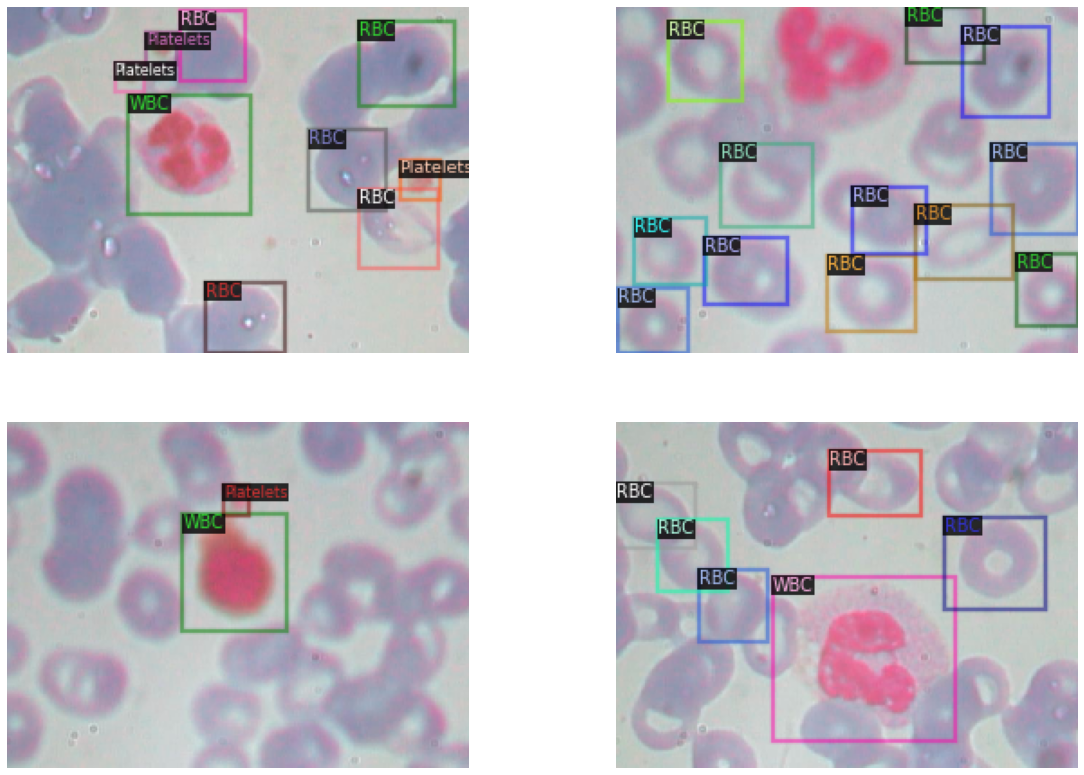

In [7]:
fig, ax = plt.subplots(2, 2, figsize =(20,14))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1] ]
i=-1
for d in random.sample(dataset_dicts, 4):
    i=i+1    
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1],
                   metadata=metadata_dicts, 
                   scale=0.4, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_dataset_dict(d)
    indices[i].grid(False)
    indices[i].axis('off')
    indices[i].imshow(out.get_image()[:, :, ::-1])
    